<a href="https://colab.research.google.com/github/VindiSovia/Analisis_Sentimen/blob/main/Proses_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install Sastrawi
!pip install emoji
!pip install googletrans==4.0.0-rc1

import pandas as pd
import re
import string

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=ee5a765f71d8d0584934700b03f3c4219b40b9a9b3b2b6bffe99912ec865cee5
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160f

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**GENERAL**

In [ ]:
bkl_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWT/bukalapakTwt.csv")
lzd_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWT/LazadaTwt.csv")
shp_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWT/shopeeTwt.csv")
tkp_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWT/tokopediaTwt.csv")

**OFFICIAL**

In [ ]:
bkl_ofc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWTOFC/bukalapakOfcTwt.csv")
lzd_ofc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWTOFC/lazadaTwtOfc12.csv")
shp_ofc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWTOFC/shopeeOfcTwt.csv")
tkp_ofc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/TWTOFC/tokopediaOfcTwt.csv")

In [ ]:
tkp_ofc.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1775978452832891257,Fri Apr 05 02:25:23 +0000 2024,0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",1776073621707936204,NaN,NaN,in,NaN,0,1,0,https://twitter.com/TokopediaCare/status/17760...,2431564153,TokopediaCare
1,1792917055223574604,Tue May 21 13:55:11 +0000 2024,0,Halo @tokopedia @TokopediaCare Ini benar teleg...,1792917055223574604,https://pbs.twimg.com/media/GOG4jQ9WoAA2V-b.jpg,NaN,in,"Nangro Aceh Darussalam, Indone",0,1,0,https://x.com/masawep08/status/179291705522357...,2151205796,masawep08
2,1775912776827015454,Thu Apr 04 16:14:10 +0000 2024,0,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,1775919801095139734,NaN,NaN,in,NaN,0,1,0,https://twitter.com/aridingustaf/status/177591...,1276807873276727298,aridingustaf
3,1792903177685086410,Tue May 21 13:00:02 +0000 2024,2,Hayoo yang lagi streaming banyak drakor~ Mendi...,1792903177685086410,https://pbs.twimg.com/media/GOGmAegawAAVOVb.jpg,NaN,in,NaN,0,2,0,https://x.com/Viu_ID/status/1792903177685086410,4712543484,Viu_ID
4,1775153026682212628,Thu Apr 04 17:14:15 +0000 2024,0,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,1775934923301609596,NaN,NaN,in,NaN,0,0,0,https://twitter.com/HilmanFinger/status/177593...,208879364,HilmanFinger


In [ ]:
print(tkp_ofc.columns)

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


In [ ]:
new_df = tkp_ofc[['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url']]
sorted_df = new_df.sort_values(by='created_at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
404,Wed May 22 10:24:09 +0000 2024,1793226333243445740,@tokopedia Tertulis di status tracking tsb kal...,0,1,0,2,in,246669887,1793224740808827116,kukluxcats,https://x.com/kukluxcats/status/17932263332434...
335,Wed May 01 13:10:21 +0000 2024,1785658013690503622,Sumpah kocak banget tiba2 aku ada di-invite gi...,0,0,1,6,in,800797782,1785658013690503622,alatuskong,https://x.com/alatuskong/status/17856580136905...
150,Wed Jul 29 15:19:27 +0000 2020,1288494352981880832,[] Terima kasih banyak @tokopedia 100/100 Dan ...,27,436,3674,7795,in,1133734878334279683,1288494352981880832,ARMYTEAMIID,https://x.com/ARMYTEAMIID/status/1288494352981...
71,Wed Jul 29 15:00:20 +0000 2020,1288489544115871745,Haloo~ siapa di sini yang nonton acara #WaktuI...,41,575,1825,14888,in,725245226067992577,1288489544115871745,Indomilk,https://x.com/Indomilk/status/1288489544115871745
322,Wed Jul 29 14:15:41 +0000 2020,1288478303733477377,Seruuuu bangeeet!! Terimakasih banyak @tokoped...,8,231,708,5568,in,966230232742051840,1288478303733477377,Yerimakoo,https://x.com/Yerimakoo/status/128847830373347...


In [ ]:
df = tkp_ofc[['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url']]

In [ ]:
df=df[['full_text']]

In [ ]:
df = df.dropna(axis=1)

In [ ]:
df.head()

,full_text
0,"@kulijago Hai Kak Yanto, silakan infokan invoi..."
1,Halo @tokopedia @TokopediaCare Ini benar teleg...
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...
3,Hayoo yang lagi streaming banyak drakor~ Mendi...
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...


# **INFO ISI TABEL**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [ ]:
df.isnull().sum()

full_text    0
dtype: int64

In [ ]:
df.shape

(505, 1)

# **CLEANSING**

In [ ]:
import emoji

def clean_text(text):
  #Menghapus @ beserta kata di belakangnya
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  #Menghapus hashtag
  text = re.sub(r'#\w+', '', text)
  #retweet
  text = re.sub(r'RT[\s]+', '', text)
  #Mengghapus HTTP/HTTPS
  text = re.sub(r'http(s)?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  #Menghapus spasi dari kalimat
  text = re.sub(r'\s+', ' ', text).strip()
  #Menghapus angka dari kalimat
  text = re.sub(r'\d+', '', text)

  # Menghapus emoji dari kalimat
  text = emoji.replace_emoji(text, replace="")

  return text


In [ ]:
df['text_clean'] = df['full_text'].apply(clean_text)
df.head()

,full_text,text_clean
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",Hai Kak Yanto silakan infokan invoice atau res...
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,Halo Ini benar telegram resmi kalian Aku menci...
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,Hayoo yang lagi streaming banyak drakor Mendin...
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...


In [ ]:
df['text_clean'] = df['text_clean'].str.lower()
df.head()

,full_text,text_clean
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...


# **NORMALIASI**

In [ ]:
# Kamus singkatan ke kata baku
kamus_singkatan = {
     "yg": "yang",
    "kurleb": "kurang lebih",
    "udh": "udah",
    "gak": "tidak",
    "ga": "tidak",
    "skrg": "sekarang",
    "bgt": "banget",
    "krn": "karena",
    "th": "tahun",
    "kyk": "kayak",
    "jd": "jadi",
    "jdi": "jadi",
    "tp": "tapi",
    "byk": "banyak",
    "bnyk": "banyak",
    "utk": "untuk",
    "dg": "dengan",
    "sy": "saya",
    "gue": "saya",
    "gua": "saya",
    "w": "saya",
    "apk": "aplikasi",
    "app": "aplikasi",
    "ngga": "tidak",
    'klo': "kalau",
    "bgt": "banget",
     "bngt": "banget",
    "tlng": "tolong",
    "tlg": "tolong",
     "lgi":"lagi",
     "lg": "lagi"
    # Tambahkan singkatan dan kata baku lainnya sesuai kebutuhan
}

def benarkan_singkatan(teks, kamus):
    kata_kunci = teks.split()  # Membagi teks menjadi kata-kata
    teks_benar = []
    for kata in kata_kunci:
        teks_benar.append(kamus.get(kata, kata))  # Mengganti kata singkatan jika ada dalam kamus
    return " ".join(teks_benar)  # Menggabungkan kembali kata-kata menjadi teks


In [ ]:
# Terapkan fungsi benarkan_singkatan ke setiap entri dalam kolom 'text_clean'
df['baku'] = df['text_clean'].apply(benarkan_singkatan, kamus=kamus_singkatan)
df.head()

,full_text,text_clean,baku
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...


# **Tokenizing**

In [ ]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
def tokenize_text(kalimat):
  tokens = nltk.tokenize.word_tokenize(kalimat)
  return tokens

In [ ]:
df['token'] = df['baku'].apply(tokenize_text)
df.head()

,full_text,text_clean,baku,token
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"[hai, kak, yanto, silakan, infokan, invoice, a..."
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"[halo, ini, benar, telegram, resmi, kalian, ak..."
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"[kak, boleh, minta, formatnya, tidak, aku, bar..."
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"[hayoo, yang, lagi, streaming, banyak, drakor,..."
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"[kalau, dlu, sblum, d, konfirm, pembeli, kagak..."


# **Stopword Removal**

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
def stopwords_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [ ]:
df['stopword'] = df['token'].apply(stopwords_text)
df.head()

,full_text,text_clean,baku,token,stop
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"[hai, kak, yanto, silakan, infokan, invoice, a...","[hai, kak, yanto, silakan, infokan, invoice, r..."
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"[halo, ini, benar, telegram, resmi, kalian, ak...","[halo, benar, telegram, resmi, kalian, aku, me..."
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"[kak, boleh, minta, formatnya, tidak, aku, bar...","[kak, minta, formatnya, aku, barusan, transaks..."
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"[hayoo, yang, lagi, streaming, banyak, drakor,...","[hayoo, streaming, banyak, drakor, mending, ka..."
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"[kalau, dlu, sblum, d, konfirm, pembeli, kagak...","[kalau, dlu, sblum, d, konfirm, pembeli, kagak..."


# **Stemming**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Instantiate StemmerFactory
stem_factory = StemmerFactory()

# Create stemmer
stemmer = stem_factory.create_stemmer()

In [ ]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

In [ ]:
df['stemmed'] = df['stop'].apply(stemming_text)
df.head()

,full_text,text_clean,baku,token,stop,stemmed
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"[hai, kak, yanto, silakan, infokan, invoice, a...","[hai, kak, yanto, silakan, infokan, invoice, r...","[hai, kak, yanto, sila, info, invoice, resi, k..."
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"[halo, ini, benar, telegram, resmi, kalian, ak...","[halo, benar, telegram, resmi, kalian, aku, me...","[halo, benar, telegram, resmi, kalian, aku, ci..."
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"[kak, boleh, minta, formatnya, tidak, aku, bar...","[kak, minta, formatnya, aku, barusan, transaks...","[kak, minta, format, aku, barusan, transaksi, ..."
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"[hayoo, yang, lagi, streaming, banyak, drakor,...","[hayoo, streaming, banyak, drakor, mending, ka...","[hayoo, streaming, banyak, drakor, mending, ka..."
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"[kalau, dlu, sblum, d, konfirm, pembeli, kagak...","[kalau, dlu, sblum, d, konfirm, pembeli, kagak...","[kalau, dlu, sblum, d, konfirm, beli, kagak, t..."


In [ ]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
df.head()

,full_text,text_clean,baku,token,stop,stemmed,text_string
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"[hai, kak, yanto, silakan, infokan, invoice, a...","[hai, kak, yanto, silakan, infokan, invoice, r...","[hai, kak, yanto, sila, info, invoice, resi, k...",yanto sila info invoice resi kendala lalu lebi...
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"[halo, ini, benar, telegram, resmi, kalian, ak...","[halo, benar, telegram, resmi, kalian, aku, me...","[halo, benar, telegram, resmi, kalian, aku, ci...",halo benar telegram resmi kalian cium aroma sc...
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"[kak, boleh, minta, formatnya, tidak, aku, bar...","[kak, minta, formatnya, aku, barusan, transaks...","[kak, minta, format, aku, barusan, transaksi, ...",minta format barusan transaksi tokopedia saldo...
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"[hayoo, yang, lagi, streaming, banyak, drakor,...","[hayoo, streaming, banyak, drakor, mending, ka...","[hayoo, streaming, banyak, drakor, mending, ka...",hayoo streaming banyak drakor mending kamu pak...
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"[kalau, dlu, sblum, d, konfirm, pembeli, kagak...","[kalau, dlu, sblum, d, konfirm, pembeli, kagak...","[kalau, dlu, sblum, d, konfirm, beli, kagak, t...",kalau sblum konfirm beli kagak driver aprove s...


# **Translate**

**Translate**

In [ ]:
!pip install translate

In [ ]:
from translate import Translator

def convert_eng(tweet):
  translator = Translator(to_lang="en", from_lang="id")
  translation = translator.translate(tweet)
  return translation

df['tweet_english'] = df['text_string'].apply(convert_eng)
df.to_csv("/content/drive/MyDrive/Skripsi/Dataset/Terjemah/twt/bukapalak.csv")

**Google Translate**

In [ ]:
from googletrans import Translator

translator = Translator()

# Fungsi untuk menerjemahkan teks
def translate_text(text):
    if text is None or text == "":
        return text
    return translator.translate(text, src="id", dest="en").text

# Terjemahkan isi value pada kolom df['text_string']
df["tweet_english"] = df["text_string"].apply(lambda x: translate_text(x))
df.to_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt_ofc/tokopedia_ofc.csv")
df.head()

,full_text,text_clean,baku,token,stop,stemmed,text_string,tweet_english
0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"[hai, kak, yanto, silakan, infokan, invoice, a...","[hai, kak, yanto, silakan, infokan, invoice, r...","[hai, kak, yanto, sila, info, invoice, resi, k...",yanto sila info invoice resi kendala lalu lebi...,Yanto Sila Info Invoice Receipt Resi then further
1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"[halo, ini, benar, telegram, resmi, kalian, ak...","[halo, benar, telegram, resmi, kalian, aku, me...","[halo, benar, telegram, resmi, kalian, aku, ci...",halo benar telegram resmi kalian cium aroma sc...,"hello, it's true that you officially kiss the ..."
2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"[kak, boleh, minta, formatnya, tidak, aku, bar...","[kak, minta, formatnya, aku, barusan, transaks...","[kak, minta, format, aku, barusan, transaksi, ...",minta format barusan transaksi tokopedia saldo...,Ask for the format just the transaction tokope...
3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"[hayoo, yang, lagi, streaming, banyak, drakor,...","[hayoo, streaming, banyak, drakor, mending, ka...","[hayoo, streaming, banyak, drakor, mending, ka...",hayoo streaming banyak drakor mending kamu pak...,Hayoo streaming a lot of drakor you better use...
4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"[kalau, dlu, sblum, d, konfirm, pembeli, kagak...","[kalau, dlu, sblum, d, konfirm, pembeli, kagak...","[kalau, dlu, sblum, d, konfirm, beli, kagak, t...",kalau sblum konfirm beli kagak driver aprove s...,"If you haven't confirmed, you will not buy you..."


# **HASIL TRANSLATE**

In [ ]:
bkt_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt/bukalapak.csv")
lzd_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt/lazada.csv")
shp_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt/shopee.csv")
tkp_twt = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt/tokopedia.csv")

In [ ]:
bkt_toc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt_ofc/bukapalak_ofc.csv")
lzd_toc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt_ofc/lazada_ofc.csv")
shp_toc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt_ofc/shopee_ofc.csv")
tkp_toc = pd.read_csv("/content/drive/MyDrive/Skripsi/Dataset/500/Translate/twt_ofc/tokopedia_ofc.csv")

In [ ]:
df = tkp_toc

In [ ]:
df['tweet_english'] = df['tweet_english'].str.lower()
df.head()

,Unnamed: 0,full_text,text_clean,baku,token,stop,stemmed,text_string,tweet_english
0,0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"['hai', 'kak', 'yanto', 'silakan', 'infokan', ...","['hai', 'kak', 'yanto', 'silakan', 'infokan', ...","['hai', 'kak', 'yanto', 'sila', 'info', 'invoi...",yanto sila info invoice resi kendala lalu lebi...,yanto sila info invoice receipt resi then further
1,1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"['halo', 'ini', 'benar', 'telegram', 'resmi', ...","['halo', 'benar', 'telegram', 'resmi', 'kalian...","['halo', 'benar', 'telegram', 'resmi', 'kalian...",halo benar telegram resmi kalian cium aroma sc...,"hello, it's true that you officially kiss the ..."
2,2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"['kak', 'boleh', 'minta', 'formatnya', 'tidak'...","['kak', 'minta', 'formatnya', 'aku', 'barusan'...","['kak', 'minta', 'format', 'aku', 'barusan', '...",minta format barusan transaksi tokopedia saldo...,ask for the format just the transaction tokope...
3,3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"['hayoo', 'yang', 'lagi', 'streaming', 'banyak...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...",hayoo streaming banyak drakor mending kamu pak...,hayoo streaming a lot of drakor you better use...
4,4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'bel...",kalau sblum konfirm beli kagak driver aprove s...,"if you haven't confirmed, you will not buy you..."


# **LABELING NLTK**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sentiments = SentimentIntensityAnalyzer()
df["Positif"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet_english"]]
df["Negatif"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet_english"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet_english"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["tweet_english"]]
df.head()

AttributeError: 'float' object has no attribute 'encode'

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["Positif"] = df["tweet_english"].apply(lambda x: sentiments.polarity_scores(str(x))["pos"])
df["Negatif"] = df["tweet_english"].apply(lambda x: sentiments.polarity_scores(str(x))["neg"])
df["Neutral"] = df["tweet_english"].apply(lambda x: sentiments.polarity_scores(str(x))["neu"])
df['Compound'] = df["tweet_english"].apply(lambda x: sentiments.polarity_scores(str(x))["compound"])

In [ ]:
score = df["Compound"].values
sentiment = []
for i in score:
  if i >= 0.05 :
    sentiment.append('positif')
  elif i <= -0.05 :
    sentiment.append('negatif')
  else:
    sentiment.append('netral')
df["Label"] = sentiment
df.head()

,Unnamed: 0,full_text,text_clean,baku,token,stop,stemmed,text_string,tweet_english,Positif,Negatif,Neutral,Compound,Label
0,0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"['hai', 'kak', 'yanto', 'silakan', 'infokan', ...","['hai', 'kak', 'yanto', 'silakan', 'infokan', ...","['hai', 'kak', 'yanto', 'sila', 'info', 'invoi...",yanto sila info invoice resi kendala lalu lebi...,yanto sila info invoice receipt resi then further,0.000,0.000,1.000,0.0000,netral
1,1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"['halo', 'ini', 'benar', 'telegram', 'resmi', ...","['halo', 'benar', 'telegram', 'resmi', 'kalian...","['halo', 'benar', 'telegram', 'resmi', 'kalian...",halo benar telegram resmi kalian cium aroma sc...,"hello, it's true that you officially kiss the ...",0.345,0.145,0.510,0.6249,positif
2,2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"['kak', 'boleh', 'minta', 'formatnya', 'tidak'...","['kak', 'minta', 'formatnya', 'aku', 'barusan'...","['kak', 'minta', 'format', 'aku', 'barusan', '...",minta format barusan transaksi tokopedia saldo...,ask for the format just the transaction tokope...,0.000,0.000,1.000,0.0000,netral
3,3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"['hayoo', 'yang', 'lagi', 'streaming', 'banyak...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...",hayoo streaming banyak drakor mending kamu pak...,hayoo streaming a lot of drakor you better use...,0.319,0.000,0.681,0.7269,positif
4,4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'bel...",kalau sblum konfirm beli kagak driver aprove s...,"if you haven't confirmed, you will not buy you...",0.000,0.115,0.885,-0.5423,negatif


# **LABEL YANG BERISIKAN NETRAL**

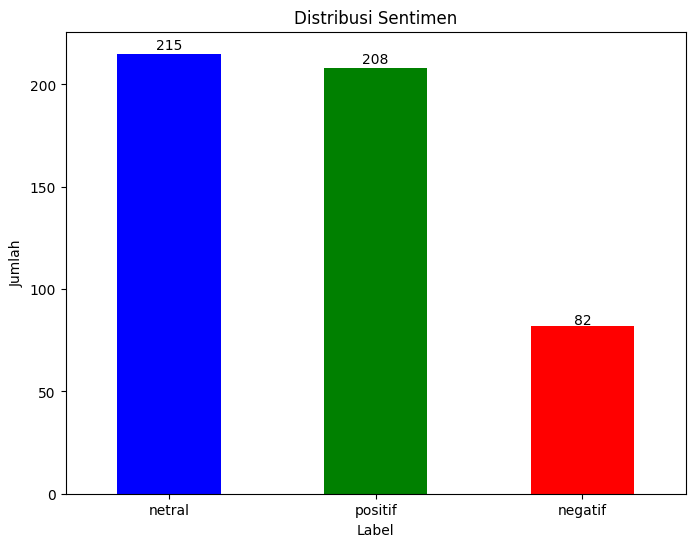

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Warna untuk setiap label
label_colors = {'positif': 'green', 'negatif': 'red', 'netral': 'blue'}

# Membuat plot dari hasil yang tersisa
plt.figure(figsize=(8, 6))
label_counts = df['Label'].value_counts()
colors = [label_colors[label] for label in label_counts.index]

ax = label_counts.plot(kind='bar', color=colors)

# Menambahkan angka hasil di atas chart
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() * 1.01),
                ha='center')

plt.title('Distribusi Sentimen')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

# **HAPUS LABEL YANG BERISIKAN NETRAL**

In [ ]:
import numpy as np

# Mengganti nilai 'Netral' menjadi NaN menggunakan metode replace
df['Label'].replace('netral', np.nan, inplace=True)

In [ ]:
df.head()

,Unnamed: 0,full_text,text_clean,baku,token,stop,stemmed,text_string,tweet_english,Positif,Negatif,Neutral,Compound,Label
0,0,"@kulijago Hai Kak Yanto, silakan infokan invoi...",hai kak yanto silakan infokan invoice atau res...,hai kak yanto silakan infokan invoice atau res...,"['hai', 'kak', 'yanto', 'silakan', 'infokan', ...","['hai', 'kak', 'yanto', 'silakan', 'infokan', ...","['hai', 'kak', 'yanto', 'sila', 'info', 'invoi...",yanto sila info invoice resi kendala lalu lebi...,yanto sila info invoice receipt resi then further,0.000,0.000,1.000,0.0000,NaN
1,1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"['halo', 'ini', 'benar', 'telegram', 'resmi', ...","['halo', 'benar', 'telegram', 'resmi', 'kalian...","['halo', 'benar', 'telegram', 'resmi', 'kalian...",halo benar telegram resmi kalian cium aroma sc...,"hello, it's true that you officially kiss the ...",0.345,0.145,0.510,0.6249,positif
2,2,@wakdenoq @PujiHeriyanto10 @gopayindonesia kak...,kak boleh minta formatnya ngga aku barusan tra...,kak boleh minta formatnya tidak aku barusan tr...,"['kak', 'boleh', 'minta', 'formatnya', 'tidak'...","['kak', 'minta', 'formatnya', 'aku', 'barusan'...","['kak', 'minta', 'format', 'aku', 'barusan', '...",minta format barusan transaksi tokopedia saldo...,ask for the format just the transaction tokope...,0.000,0.000,1.000,0.0000,NaN
3,3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"['hayoo', 'yang', 'lagi', 'streaming', 'banyak...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...",hayoo streaming banyak drakor mending kamu pak...,hayoo streaming a lot of drakor you better use...,0.319,0.000,0.681,0.7269,positif
4,4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'bel...",kalau sblum konfirm beli kagak driver aprove s...,"if you haven't confirmed, you will not buy you...",0.000,0.115,0.885,-0.5423,negatif


In [ ]:
df.isna()

,Unnamed: 0,full_text,text_clean,baku,token,stop,stemmed,text_string,tweet_english,Positif,Negatif,Neutral,Compound,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,False,False,False,False,False,False,False,False,False,False,False,False,False,False
501,False,False,False,False,False,False,False,True,True,False,False,False,False,True
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna(subset=['Label'],inplace = True)

In [ ]:
df.isnull().sum()

Unnamed: 0       0
full_text        0
text_clean       0
baku             0
token            0
stop             0
stemmed          0
text_string      0
tweet_english    0
Positif          0
Negatif          0
Neutral          0
Compound         0
Label            0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,full_text,text_clean,baku,token,stop,stemmed,text_string,tweet_english,Positif,Negatif,Neutral,Compound,Label
1,1,Halo @tokopedia @TokopediaCare Ini benar teleg...,halo ini benar telegram resmi kalian aku menci...,halo ini benar telegram resmi kalian aku menci...,"['halo', 'ini', 'benar', 'telegram', 'resmi', ...","['halo', 'benar', 'telegram', 'resmi', 'kalian...","['halo', 'benar', 'telegram', 'resmi', 'kalian...",halo benar telegram resmi kalian cium aroma sc...,"hello, it's true that you officially kiss the ...",0.345,0.145,0.510,0.6249,positif
3,3,Hayoo yang lagi streaming banyak drakor~ Mendi...,hayoo yang lagi streaming banyak drakor mendin...,hayoo yang lagi streaming banyak drakor mendin...,"['hayoo', 'yang', 'lagi', 'streaming', 'banyak...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...","['hayoo', 'streaming', 'banyak', 'drakor', 'me...",hayoo streaming banyak drakor mending kamu pak...,hayoo streaming a lot of drakor you better use...,0.319,0.000,0.681,0.7269,positif
4,4,@hallomay__ @gojekindonesia @ambar_AWP @tokope...,kalau dlu sblum d konfirm pembeli kagak bisa t...,kalau dlu sblum d konfirm pembeli kagak bisa t...,"['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'pem...","['kalau', 'dlu', 'sblum', 'd', 'konfirm', 'bel...",kalau sblum konfirm beli kagak driver aprove s...,"if you haven't confirmed, you will not buy you...",0.000,0.115,0.885,-0.5423,negatif
7,7,@TokopediaCare benefitnya bayarin dulu nanti d...,benefitnya bayarin dulu nanti diganti,benefitnya bayarin dulu nanti diganti,"['benefitnya', 'bayarin', 'dulu', 'nanti', 'di...","['benefitnya', 'bayarin', 'dulu', 'diganti']","['benefitnya', 'bayarin', 'dulu', 'ganti']",benefitnya bayarin dulu ganti,the benefit is to pay first replace,0.319,0.149,0.532,0.3818,positif
8,8,Haloo @JNECare apa skrg konsep JNE itu paketny...,haloo apa skrg konsep jne itu paketnya di pick...,haloo apa sekarang konsep jne itu paketnya di ...,"['haloo', 'apa', 'sekarang', 'konsep', 'jne', ...","['haloo', 'apa', 'sekarang', 'konsep', 'jne', ...","['haloo', 'apa', 'sekarang', 'konsep', 'jne', ...",haloo sekarang konsep paket pick kota tuju pak...,hello now the concept of the city pick package...,0.000,0.088,0.912,-0.4019,negatif


In [ ]:
df.shape

(290, 14)

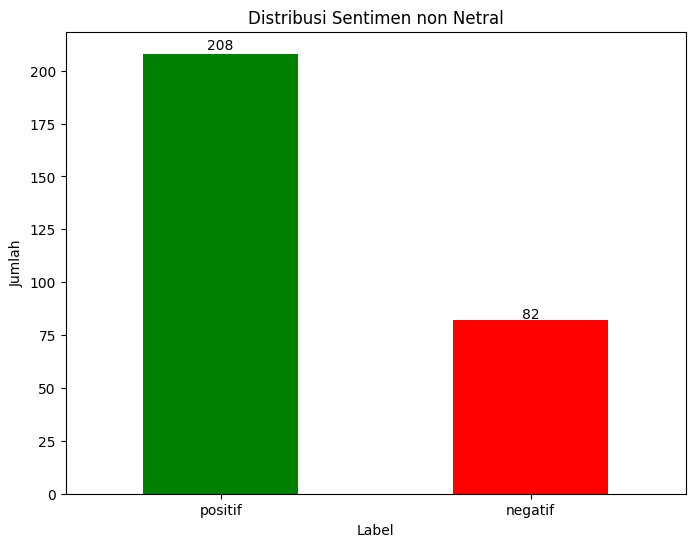

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Warna untuk setiap label
label_colors = {'positif': 'green', 'negatif': 'red'}

# Membuat plot dari hasil yang tersisa
plt.figure(figsize=(8, 6))
label_counts = df['Label'].value_counts()
colors = [label_colors[label] for label in label_counts.index]

ax = label_counts.plot(kind='bar', color=colors)

# Menambahkan angka hasil di atas chart
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() * 1.01),
                ha='center')

plt.title('Distribusi Sentimen non Netral')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

# Menyimpan hasil gambar
plt.savefig('/content/drive/MyDrive/Skripsi/Hasil Penelitian/PLOT/TWT OFC/TKP_TOC.png')

# Menampilkan plot
plt.show()

# Menutup plot untuk membersihkan memori
plt.close()

# **TF-IDF**

In [ ]:
X = df['tweet_english']
y = df['Label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

# **Handing Imbalace**

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

Fold 1:
Accuracy: 0.8333333333333334
Precision: 0.859375
Recall: 0.8397727272727273
F1 Score: 0.8318077803203661
Classification Report for Fold 1:
              precision    recall  f1-score   support

     negatif       0.75      0.97      0.85        40
     positif       0.97      0.70      0.82        44

    accuracy                           0.83        84
   macro avg       0.86      0.84      0.83        84
weighted avg       0.86      0.83      0.83        84



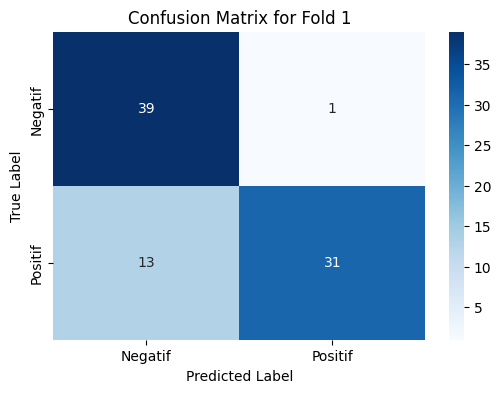

Confusion Matrix:
[[39  1]
 [13 31]]

Fold 2:
Accuracy: 0.8554216867469879
Precision: 0.8846153846153846
Recall: 0.8604651162790697
F1 Score: 0.8537015276145712
Classification Report for Fold 2:
              precision    recall  f1-score   support

     negatif       0.77      1.00      0.87        40
     positif       1.00      0.72      0.84        43

    accuracy                           0.86        83
   macro avg       0.88      0.86      0.85        83
weighted avg       0.89      0.86      0.85        83



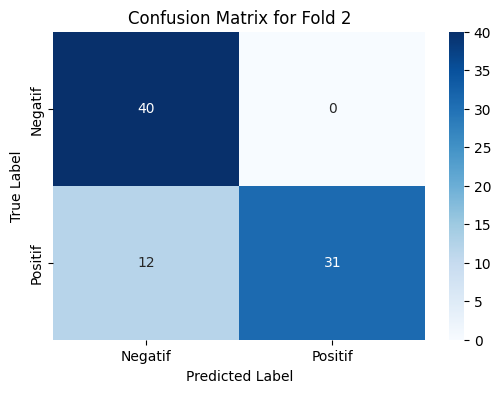

Confusion Matrix:
[[40  0]
 [12 31]]

Fold 3:
Accuracy: 0.7951807228915663
Precision: 0.8508771929824561
Recall: 0.8023255813953488
F1 Score: 0.7891827282235171
Classification Report for Fold 3:
              precision    recall  f1-score   support

     negatif       0.70      1.00      0.82        40
     positif       1.00      0.60      0.75        43

    accuracy                           0.80        83
   macro avg       0.85      0.80      0.79        83
weighted avg       0.86      0.80      0.79        83



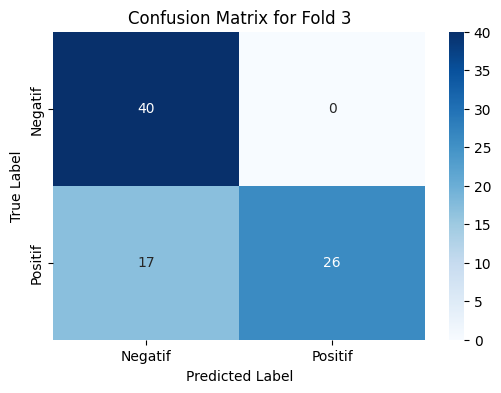

Confusion Matrix:
[[40  0]
 [17 26]]

Fold 4:
Accuracy: 0.8554216867469879
Precision: 0.876531862745098
Recall: 0.8568524970963995
F1 Score: 0.8537015276145712
Classification Report for Fold 4:
              precision    recall  f1-score   support

     negatif       0.78      0.98      0.87        41
     positif       0.97      0.74      0.84        42

    accuracy                           0.86        83
   macro avg       0.88      0.86      0.85        83
weighted avg       0.88      0.86      0.85        83



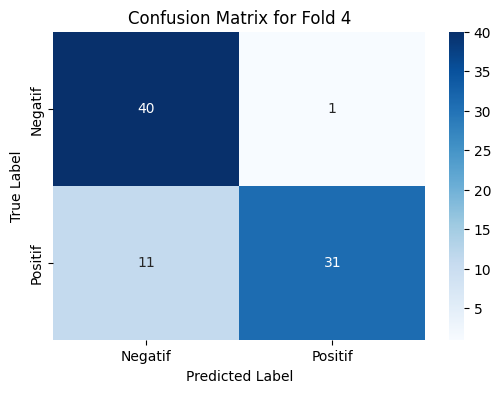

Confusion Matrix:
[[40  1]
 [11 31]]

Fold 5:
Accuracy: 0.9156626506024096
Precision: 0.9351851851851851
Recall: 0.9027777777777778
F1 Score: 0.9115003808073115
Classification Report for Fold 5:
              precision    recall  f1-score   support

     negatif       0.87      1.00      0.93        47
     positif       1.00      0.81      0.89        36

    accuracy                           0.92        83
   macro avg       0.94      0.90      0.91        83
weighted avg       0.93      0.92      0.91        83



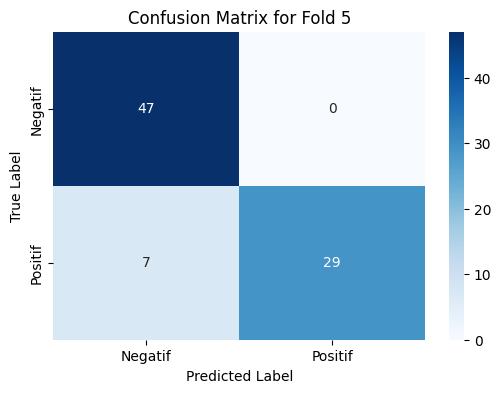

Confusion Matrix:
[[47  0]
 [ 7 29]]


Average Accuracy: 0.8510040160642571
Average Precision: 0.8813169251056248
Average Recall: 0.8524387399642647
Average F1 Score: 0.8479787889160674


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Inisialisasi KFold dengan jumlah lipatan (splits) 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan metrik per fold
results = []

# Iterasi melalui setiap fold
fold = 1
for train_index, test_index in kf.split(x_sm, y_sm):
    # Bagi data berdasarkan train_index dan test_index dari hasil SMOTE
    X_train, X_test = x_sm[train_index], x_sm[test_index]
    y_train, y_test = y_sm[train_index], y_sm[test_index]

    # Inisialisasi dan latih model Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Prediksi dengan model
    yn_pred = nb_model.predict(X_test)

    # Hitung metrik
    accuracy_nb = accuracy_score(y_test, yn_pred)
    precision = precision_score(y_test, yn_pred, average='macro')
    recall = recall_score(y_test, yn_pred, average='macro')
    f1 = f1_score(y_test, yn_pred, average='macro')

    # Hitung dan simpan confusion matrix
    cm = confusion_matrix(y_test, yn_pred)

    # Simpan metrik dan confusion matrix ke dalam list
    fold_results = {
        'Fold': fold,
        'Accuracy': accuracy_nb,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }
    results.append(fold_results)

    # Print metrik untuk fold ini
    print(f"Fold {fold}:")
    print(f"Accuracy: {accuracy_nb}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Print classification report
    print(f"Classification Report for Fold {fold}:")
    print(classification_report(y_test, yn_pred))

    # Print dan visualisasikan confusion matrix
    class_label = ["Negatif", "Positif"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    plt.figure(figsize=(6,4))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("Confusion Matrix:")
    print(cm)
    print()

    fold += 1

# Simpan hasil ke dalam DataFrame
results_df = pd.DataFrame(results)

# Simpan DataFrame ke CSV
results_df.to_csv("/content/drive/MyDrive/Skripsi/Hasil Penelitian/Akurasi/TWT OFC/TKP_TOC_nb.csv")

# Print metrik rata-rata dari semua fold
print(f"\nAverage Accuracy: {results_df['Accuracy'].mean()}")
print(f"Average Precision: {results_df['Precision'].mean()}")
print(f"Average Recall: {results_df['Recall'].mean()}")
print(f"Average F1 Score: {results_df['F1 Score'].mean()}")

Fold 1:
Accuracy: 0.8690476190476191
Precision: 0.8692307692307693
Recall: 0.8681818181818182
F1 Score: 0.8685819940264543
Classification Report for Fold 1:
              precision    recall  f1-score   support

     negatif       0.87      0.85      0.86        40
     positif       0.87      0.89      0.88        44

    accuracy                           0.87        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.87      0.87      0.87        84



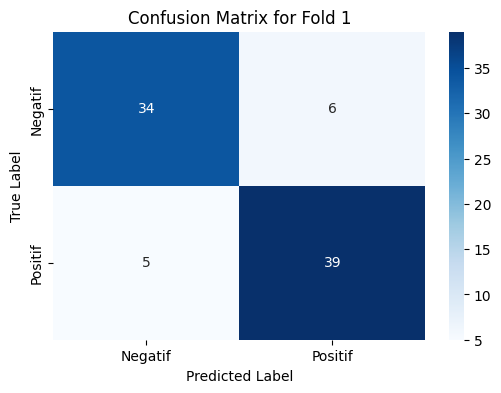

Confusion Matrix:
[[34  6]
 [ 5 39]]

Fold 2:
Accuracy: 0.8433734939759037
Precision: 0.8545454545454545
Recall: 0.8401162790697674
F1 Score: 0.8410664309913094
Classification Report for Fold 2:
              precision    recall  f1-score   support

     negatif       0.91      0.75      0.82        40
     positif       0.80      0.93      0.86        43

    accuracy                           0.84        83
   macro avg       0.85      0.84      0.84        83
weighted avg       0.85      0.84      0.84        83



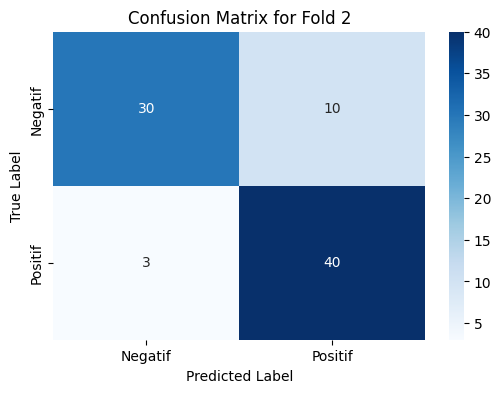

Confusion Matrix:
[[30 10]
 [ 3 40]]

Fold 3:
Accuracy: 0.891566265060241
Precision: 0.8918997668997669
Recall: 0.8909883720930232
F1 Score: 0.8913138367525099
Classification Report for Fold 3:
              precision    recall  f1-score   support

     negatif       0.90      0.88      0.89        40
     positif       0.89      0.91      0.90        43

    accuracy                           0.89        83
   macro avg       0.89      0.89      0.89        83
weighted avg       0.89      0.89      0.89        83



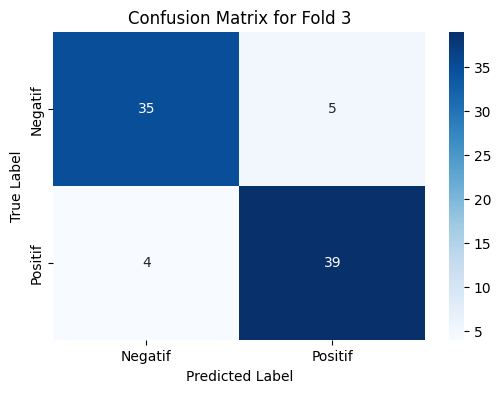

Confusion Matrix:
[[35  5]
 [ 4 39]]

Fold 4:
Accuracy: 0.8795180722891566
Precision: 0.8833725029377204
Recall: 0.8789198606271778
F1 Score: 0.8790792540792541
Classification Report for Fold 4:
              precision    recall  f1-score   support

     negatif       0.92      0.83      0.87        41
     positif       0.85      0.93      0.89        42

    accuracy                           0.88        83
   macro avg       0.88      0.88      0.88        83
weighted avg       0.88      0.88      0.88        83



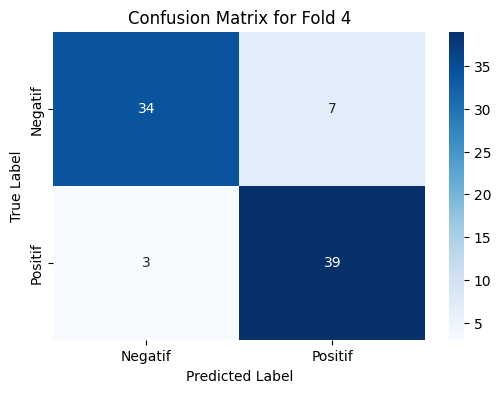

Confusion Matrix:
[[34  7]
 [ 3 39]]

Fold 5:
Accuracy: 0.8674698795180723
Precision: 0.8703488372093022
Recall: 0.8764775413711583
F1 Score: 0.8671613560308453
Classification Report for Fold 5:
              precision    recall  f1-score   support

     negatif       0.95      0.81      0.87        47
     positif       0.79      0.94      0.86        36

    accuracy                           0.87        83
   macro avg       0.87      0.88      0.87        83
weighted avg       0.88      0.87      0.87        83



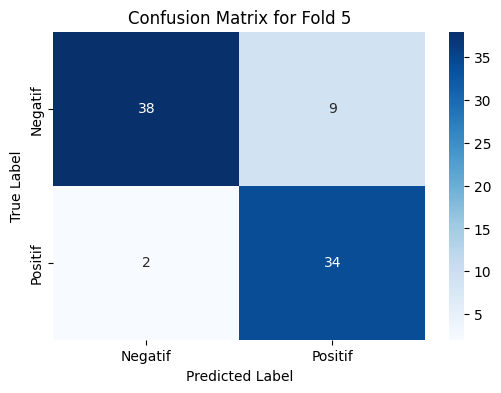

Confusion Matrix:
[[38  9]
 [ 2 34]]


Average Accuracy: 0.8701950659781984
Average Precision: 0.8738794661646025
Average Recall: 0.870936774268589
Average F1 Score: 0.8694405743760745

CSV file saved successfully.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Inisialisasi KFold dengan jumlah lipatan (splits) 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan metrik per fold
results = []

# Iterasi melalui setiap fold
fold = 1
for train_index, test_index in kf.split(x_sm, y_sm):
    # Bagi data berdasarkan train_index dan test_index dari hasil SMOTE
    X_train, X_test = x_sm[train_index], x_sm[test_index]
    y_train, y_test = y_sm[train_index], y_sm[test_index]

    # Initialize and train RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    yrf_pred = rf_model.predict(X_test)

    # Hitung metrik
    accuracy_rf = accuracy_score(y_test, yrf_pred)
    precision = precision_score(y_test, yrf_pred, average='macro')
    recall = recall_score(y_test, yrf_pred, average='macro')
    f1 = f1_score(y_test, yrf_pred, average='macro')

    # Hitung dan simpan confusion matrix
    cm = confusion_matrix(y_test, yrf_pred)

    # Simpan metrik dan confusion matrix ke dalam list
    fold_results = {
        'Fold': fold,
        'Accuracy': accuracy_rf,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }
    results.append(fold_results)

    # Print metrik untuk fold ini
    print(f"Fold {fold}:")
    print(f"Accuracy: {accuracy_rf}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Print classification report
    print(f"Classification Report for Fold {fold}:")
    print(classification_report(y_test, yrf_pred))

    # Print dan visualisasikan confusion matrix
    class_label = ["Negatif", "Positif"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    plt.figure(figsize=(6,4))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("Confusion Matrix:")
    print(cm)
    print()

    fold += 1

# Simpan hasil ke dalam DataFrame
results_df = pd.DataFrame(results)

# Simpan DataFrame ke CSV
results_df.to_csv("/content/drive/MyDrive/Skripsi/Hasil Penelitian/Akurasi/TWT OFC/TKP_TOC_rf.csv")

# Print metrik rata-rata dari semua fold
print(f"\nAverage Accuracy: {results_df['Accuracy'].mean()}")
print(f"Average Precision: {results_df['Precision'].mean()}")
print(f"Average Recall: {results_df['Recall'].mean()}")
print(f"Average F1 Score: {results_df['F1 Score'].mean()}")

# Print path to saved CSV
print("\nCSV file saved successfully.")

Fold 1:
Accuracy: 0.9047619047619048
Precision: 0.9045454545454545
Recall: 0.9045454545454545
F1 Score: 0.9045454545454545
Classification Report for Fold 1:
              precision    recall  f1-score   support

     negatif       0.90      0.90      0.90        40
     positif       0.91      0.91      0.91        44

    accuracy                           0.90        84
   macro avg       0.90      0.90      0.90        84
weighted avg       0.90      0.90      0.90        84



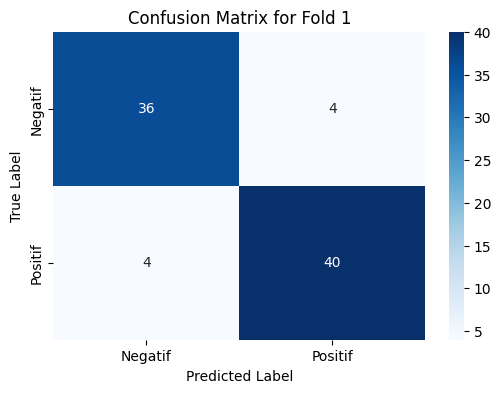

Confusion Matrix:
[[36  4]
 [ 4 40]]

Fold 2:
Accuracy: 0.891566265060241
Precision: 0.8914053426248548
Recall: 0.8918604651162791
F1 Score: 0.8915032679738563
Classification Report for Fold 2:
              precision    recall  f1-score   support

     negatif       0.88      0.90      0.89        40
     positif       0.90      0.88      0.89        43

    accuracy                           0.89        83
   macro avg       0.89      0.89      0.89        83
weighted avg       0.89      0.89      0.89        83



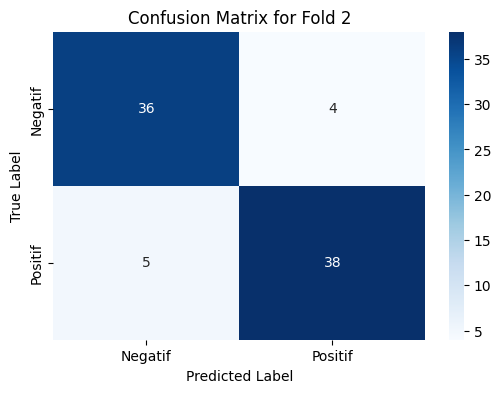

Confusion Matrix:
[[36  4]
 [ 5 38]]

Fold 3:
Accuracy: 0.8674698795180723
Precision: 0.8686046511627907
Recall: 0.8686046511627907
F1 Score: 0.8674698795180723
Classification Report for Fold 3:
              precision    recall  f1-score   support

     negatif       0.84      0.90      0.87        40
     positif       0.90      0.84      0.87        43

    accuracy                           0.87        83
   macro avg       0.87      0.87      0.87        83
weighted avg       0.87      0.87      0.87        83



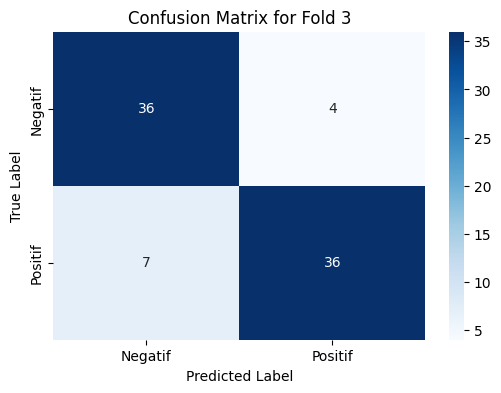

Confusion Matrix:
[[36  4]
 [ 7 36]]

Fold 4:
Accuracy: 0.891566265060241
Precision: 0.8918604651162791
Recall: 0.8914053426248548
F1 Score: 0.8915032679738563
Classification Report for Fold 4:
              precision    recall  f1-score   support

     negatif       0.90      0.88      0.89        41
     positif       0.88      0.90      0.89        42

    accuracy                           0.89        83
   macro avg       0.89      0.89      0.89        83
weighted avg       0.89      0.89      0.89        83



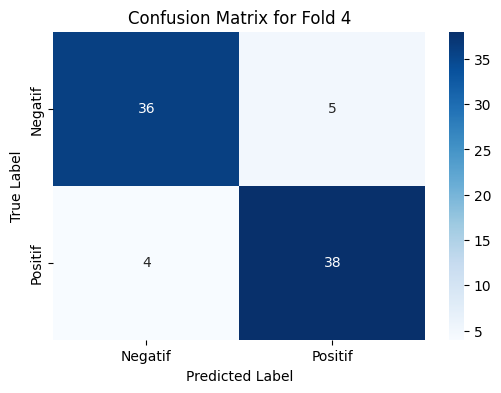

Confusion Matrix:
[[36  5]
 [ 4 38]]

Fold 5:
Accuracy: 0.9156626506024096
Precision: 0.9131701631701632
Recall: 0.9190307328605201
F1 Score: 0.9148717948717949
Classification Report for Fold 5:
              precision    recall  f1-score   support

     negatif       0.95      0.89      0.92        47
     positif       0.87      0.94      0.91        36

    accuracy                           0.92        83
   macro avg       0.91      0.92      0.91        83
weighted avg       0.92      0.92      0.92        83



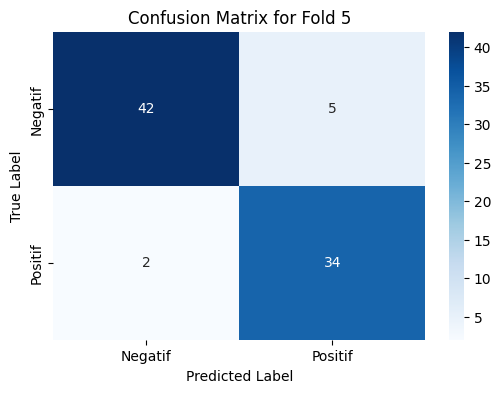

Confusion Matrix:
[[42  5]
 [ 2 34]]


Average Accuracy: 0.8942053930005738
Average Precision: 0.8939172153239084
Average Recall: 0.8950893292619799
Average F1 Score: 0.8939787329766069

CSV file saved successfully.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Inisialisasi KFold dengan jumlah lipatan (splits) 5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan metrik per fold
results = []

# Iterasi melalui setiap fold
fold = 1
for train_index, test_index in kf.split(x_sm, y_sm):
    # Bagi data berdasarkan train_index dan test_index dari hasil SMOTE
    X_train, X_test = x_sm[train_index], x_sm[test_index]
    y_train, y_test = y_sm[train_index], y_sm[test_index]

    # Inisialisasi base models
    nb_model = MultinomialNB()
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    base_models = [('nb', nb_model), ('rf', rf_model)]

    # Training stacking model
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    stacking_model.fit(X_train, y_train)

    # Evaluating stacking model
    ystk_pred = stacking_model.predict(X_test)

    # Hitung metrik
    accuracy_rf = accuracy_score(y_test, ystk_pred)
    precision = precision_score(y_test, ystk_pred, average='macro')
    recall = recall_score(y_test, ystk_pred, average='macro')
    f1 = f1_score(y_test, ystk_pred, average='macro')

    # Hitung dan simpan confusion matrix
    cm = confusion_matrix(y_test, ystk_pred)

    # Simpan metrik dan confusion matrix ke dalam list
    fold_results = {
        'Fold': fold,
        'Accuracy': accuracy_rf,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }
    results.append(fold_results)

    # Print metrik untuk fold ini
    print(f"Fold {fold}:")
    print(f"Accuracy: {accuracy_rf}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Print classification report
    print(f"Classification Report for Fold {fold}:")
    print(classification_report(y_test, ystk_pred))

    # Print dan visualisasikan confusion matrix
    class_label = ["Negatif", "Positif"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    plt.figure(figsize=(6,4))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("Confusion Matrix:")
    print(cm)
    print()

    fold += 1

# Simpan hasil ke dalam DataFrame
results_df = pd.DataFrame(results)

# Simpan DataFrame ke CSV
results_df.to_csv("/content/drive/MyDrive/Skripsi/Hasil Penelitian/Akurasi/TWT OFC/TKP_TOC_stk.csv")

# Print metrik rata-rata dari semua fold
print(f"\nAverage Accuracy: {results_df['Accuracy'].mean()}")
print(f"Average Precision: {results_df['Precision'].mean()}")
print(f"Average Recall: {results_df['Recall'].mean()}")
print(f"Average F1 Score: {results_df['F1 Score'].mean()}")

# Print path to saved CSV
print("\nCSV file saved successfully.")

In [ ]:
df.to_csv("/content/drive/MyDrive/Skripsi/Hasil Penelitian/Olahdata/TWTOFC/hasil_TKP_OTC.csv", index=False)

In [ ]:
%cp -R /content/ofc_shopee_pres.csv /content/drive/MyDrive/Skripsi/Dataset/Hasil_preprosessing/twt/ofc_shopee_pres.csv